In [155]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [156]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [157]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [158]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
plt.style.use('classic')
from matplotlib.patches import Rectangle
import pickle
from cmocean import cm
import warnings
import netCDF4 as nc
import sys
sys.path.append('../pyscripts/bylayer_extract/')
import extract_bylayer_mean_BOXMASK as ebmBOX 
from importlib import reload
from salishsea_tools import viz_tools

%matplotlib inline
warnings.simplefilter('ignore')

plt.rcParams.update({'font.size': 13,
                     'xtick.labelsize' : 13,
                     'ytick.labelsize' : 13})

In [159]:
plt.style.available

['seaborn',
 '_classic_test',
 'fast',
 'seaborn-muted',
 'classic',
 'fivethirtyeight',
 'tableau-colorblind10',
 'seaborn-whitegrid',
 'seaborn-ticks',
 'seaborn-bright',
 'ggplot',
 'seaborn-pastel',
 'seaborn-darkgrid',
 'grayscale',
 'seaborn-white',
 'seaborn-notebook',
 'dark_background',
 'seaborn-poster',
 'seaborn-dark-palette',
 'seaborn-colorblind',
 'seaborn-dark',
 'Solarize_Light2',
 'seaborn-paper',
 'seaborn-deep',
 'bmh',
 'seaborn-talk']

Text(0.5, 1.0, 'individual stations')

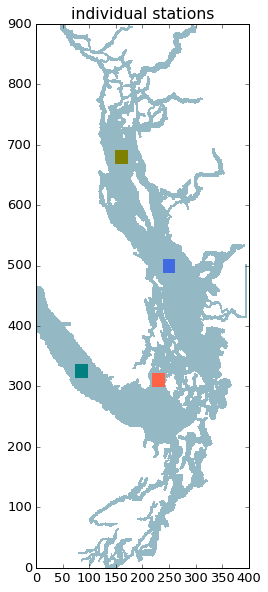

In [160]:
jdf_x = 85; jdf_y = 325; jdf_col = 'teal'
cs_x = 250; cs_y = 500; cs_col = 'royalblue'
haro_x = 230; haro_y = 310; haro_col = 'tomato'
ns_x = 160; ns_y = 680; ns_col = 'olive'

w = nc.Dataset('/data/tjarniko/results/hindcast.201905_dayavg_OmA-pH-pCO2/OmA_plus_20070104.nc')
pco2 = w['model_output']['pCO2'][:]
pco2[pco2>2e5] = np.nan
pco2[pco2<2000] = 500
fact = 1.5
fig = plt.figure(figsize=(12*fact,6.5*fact))

ax0 = fig.add_subplot(1,2,1)
#toba and bute

im = ax0.pcolormesh(pco2, cmap=cm.balance_r, vmin = 0, vmax = 800)
viz_tools.set_aspect(ax0)
#jdf
rect_jdf = Rectangle((jdf_x-10,jdf_y-10),20,20,linewidth=2,edgecolor=jdf_col,facecolor=jdf_col)
ax0.add_patch(rect_jdf)

rect_haro = Rectangle((haro_x-10,haro_y-10),20,20,linewidth=2,edgecolor=haro_col,facecolor=haro_col)
ax0.add_patch(rect_haro)

rect_cs = Rectangle((cs_x-10,cs_y-10),20,20,linewidth=2,edgecolor=cs_col,facecolor=cs_col)
ax0.add_patch(rect_cs)

rect_ns = Rectangle((ns_x-10,ns_y-10),20,20,linewidth=2,edgecolor=ns_col,facecolor=ns_col)
ax0.add_patch(rect_ns)

ax0.set_title('individual stations')




reload(ebmBOX)

    # pkldir = '/data/tjarniko/MEOPAR/analysis_tereza/notebooks/PI_CARBON_PAPER/MAIN_ANALYSIS/pkls/'
    # start = '2015-01-01' #start of timeperiod
    # end = '2015-12-31' #end of timeperiod (typically a year)
    # #ftype = 'carp' #type of model result .nc 
    # sdir = 'MAIN/BR_3rd_2015' #where under directory tree do we find ncs 
    # varname = 'dissolved_inorganic_carbon' #name of variable

run for PI4, BR3 for the above 4 stations, usage case above


#### LOAD PKLS OF ABOVE EXTRACTED QUANTITIES

In [161]:
#extract means for BR1-BR3, get fraser discharge
#var
BR1_var = pickle.load(open('../pkls/BR1_DIC_means_inletsIN.pkl' , 'rb')) 
BR2_var = pickle.load(open('../pkls/BR2_DIC_means_inletsIN.pkl' , 'rb')) 
BR3_var = pickle.load(open('../pkls/BR3_DIC_means_inletsIN.pkl' , 'rb')) 

PI1_var = pickle.load(open('../pkls/PI1_DIC_means_inletsIN.pkl' , 'rb')) 
PI2_var = pickle.load(open('../pkls/PI2_DIC_means_inletsIN.pkl' , 'rb')) 
PI3rr_var = pickle.load(open('../pkls/PI3rr_DIC_means_inletsIN.pkl' , 'rb')) 
PI4_var = pickle.load(open('../pkls/PI4_DIC_means_inletsIN.pkl' , 'rb')) 
PI4_var[PI4_var == 0] = np.nan
Fraser_discharge = pickle.load(open('../pkls/Fraser_2015_year_runoff_m3_s.pkl', 'rb'))  



mesh = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
bath = nc.Dataset('/data/tjarniko/MEOPAR/grid/bathymetry_201702.nc')
depth = mesh['gdept_1d'][:]
days_in = np.arange(1,366,1)
#make a long 3-year dataset to be able to compare spinup progress for BR run


In [162]:
BR3_var_jdf = pickle.load(open('../pkls/BR3_DIC_means_jdf_BOX.pkl','rb'))
PI4_var_jdf = pickle.load(open('../pkls/PI4_DIC_means_jdf_BOX.pkl','rb'))
BR3_var_cs = pickle.load(open('../pkls/BR3_DIC_means_cs_BOX.pkl','rb'))
PI4_var_cs = pickle.load(open('../pkls/PI4_DIC_means_cs_BOX.pkl','rb'))
BR3_var_ns = pickle.load(open('../pkls/BR3_DIC_means_ns_BOX.pkl','rb'))
PI4_var_ns = pickle.load(open('../pkls/PI4_DIC_means_ns_BOX.pkl','rb'))
BR3_var_haro = pickle.load(open('../pkls/BR3_DIC_means_haro_BOX.pkl','rb'))
PI4_var_haro = pickle.load(open('../pkls/PI4_DIC_means_haro_BOX.pkl','rb'))

#### CALCULATE DEPTH-INTEGRATED BIOLOGY

In [163]:
flag ='../pkls/BR3_flagellates_means_inletsIN.pkl'
diat ='../pkls/BR3_diatoms_means_inletsIN.pkl'
cili ='../pkls/BR3_ciliates_means_inletsIN.pkl'
csd = '../pkls/cellsize_alg2.pkl'

flag_mas = pickle.load(open(flag, 'rb'))  
diat_mas = pickle.load(open(diat, 'rb'))
cili_mas = pickle.load(open(cili, 'rb'))

mmask = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
depths = (mmask['e3t_1d'][:])

mask_broad = np.zeros([40,365])

for i in range(0,365):
    mask_broad[:,i] = depths


flag_mas_mm_m2 = np.nansum((mask_broad*flag_mas),axis = 0)
diat_mas_mm_m2 = np.nansum((mask_broad*diat_mas),axis = 0)
cili_mas_mm_m2 = np.nansum((mask_broad*cili_mas),axis = 0)

# nice plot - PI3rr

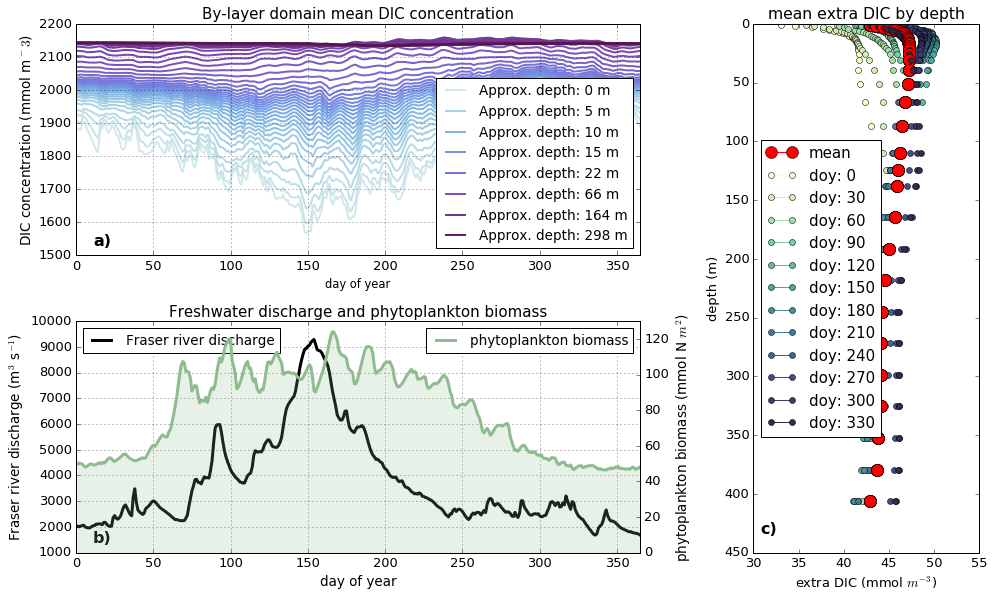

In [164]:
ts = 15 # title font
fs = 13.5 # all other font sizes
fact = 1
fig = plt.figure(figsize=(14*fact, 8.5*fact))
seg = 45
shift = 2
lw = 2
depth = mesh['e3t_0'][0,:,250,250]
ax1 = plt.subplot2grid((2,3), (0,0), colspan=2, rowspan=1)
tcm = cm.dense
for i in range(0,40):
    zdepth = np.sum(depth[0:i])
    if i%5 !=0: 
        ax1.plot(days_in,BR3_var[i,:],color = tcm(1.*(i+shift)/seg), linewidth = lw)
    if i%5 == 0:
        ax1.plot(days_in,BR3_var[i,:],color = tcm(1.*(i+shift)/seg),\
                label = 'Approx. depth: '+str(int(zdepth))+' m', linewidth = lw)
ax1.text(0.03, 0.03, 'a)', transform=ax1.transAxes, fontsize=16, fontweight='bold', va='bottom')
ax1.legend(loc = 'best', fontsize = fs)
plt.xlim([0,365*1])
plt.grid()
ax1.set_xlabel('day of year', fontsize = fs-2)
ax1.set_ylabel('DIC concentration (mmol m$^-3$)', fontsize = fs)
ax1.set_title('By-layer domain mean DIC concentration', fontsize = ts)


ax2 = plt.subplot2grid((2,3), (1,0), colspan=2, rowspan=1)
ax2b =ax2.twinx()
ax2.plot(days_in,Fraser_discharge,'-k', linewidth = 3, label = 'Fraser river discharge')
ax2.grid()
#ax2b.plot(days_in,flag_mas_mm_m2,color = 'greenyellow',label ='flagellates')
#ax2b.plot(days_in,diat_mas_mm_m2,color = 'mediumspringgreen',label ='diatoms')
#ax2b.plot(days_in,cili_mas_mm_m2,color = 'forestgreen',label ='ciliates')
ax2b.plot(days_in, flag_mas_mm_m2+cili_mas_mm_m2+diat_mas_mm_m2,\
          color = 'darkseagreen', label = 'phytoplankton biomass', linewidth = 3)
ax2b.fill_between(days_in, np.zeros_like(flag_mas_mm_m2), (flag_mas_mm_m2+cili_mas_mm_m2+diat_mas_mm_m2), \
                 color = 'darkseagreen', alpha = 0.2 )

ax2b.legend(loc = 'best', fontsize = fs)
ax2.legend(loc = 'upper left', fontsize = fs)
ax2b.set_ylabel('phytoplankton biomass (mmol N $m^2$)', fontsize = fs)
ax2.set_xlabel('day of year', fontsize = fs)
ax2.set_ylabel('Fraser river discharge (m$^3$ s$^{-1}$)', fontsize = fs)
ax2.set_title('Freshwater discharge and phytoplankton biomass', fontsize = ts)
plt.xlim([0,365])
ax2b.set_ylim([0,130])
ax2.text(0.03, 0.03, 'b)', transform=ax2.transAxes, fontsize=16, fontweight='bold', va='bottom')


ax3 = plt.subplot2grid((2,3), (0,2), colspan=1, rowspan=2)
ax3.text(0.03, 0.03, 'c)', transform=ax3.transAxes, fontsize=16, fontweight='bold', va='bottom')
tcm = cm.deep
mesh = nc.Dataset('//data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')



for d in range(0,12):
    for i in range(0,40):
        zdepth = np.sum(depth[0:i+1]) 
        if ((i == 0) & (d ==0)):        
            ax3.plot((np.nanmean(BR3_var,axis =1)[i]-\
                      np.nanmean(PI3rr_var,axis=1)[i]),zdepth,\
                     marker = 'o', color = 'r', markersize = 12, label = 'mean')
        else:
            ax3.plot((np.nanmean(BR3_var,axis =1)[i]-\
                      np.nanmean(PI3rr_var,axis=1)[i]),zdepth,\
                     marker = 'o', color = 'r', markersize = 12)
        if i == 0:
            ax3.plot((BR3_var[i,d*30]-PI3rr_var[i,d*30]),zdepth,\
                    color = tcm(1.*d/12), marker = 'o', label = 'doy: '+ str(d*30))
        else:
            ax3.plot((BR3_var[i,d*30]-PI3rr_var[i,d*30]),zdepth,\
                    color = tcm(1.*d/12), marker = 'o')

ax3.set_title('mean extra DIC by depth')
ax3.invert_yaxis()
ax3.legend(loc = 'best', fontsize = ts)
ax3.set_xlabel('extra DIC (mmol $m^{-3}$)')
ax3.set_ylabel('depth (m)')
fig.tight_layout()




## nice plot - PI4

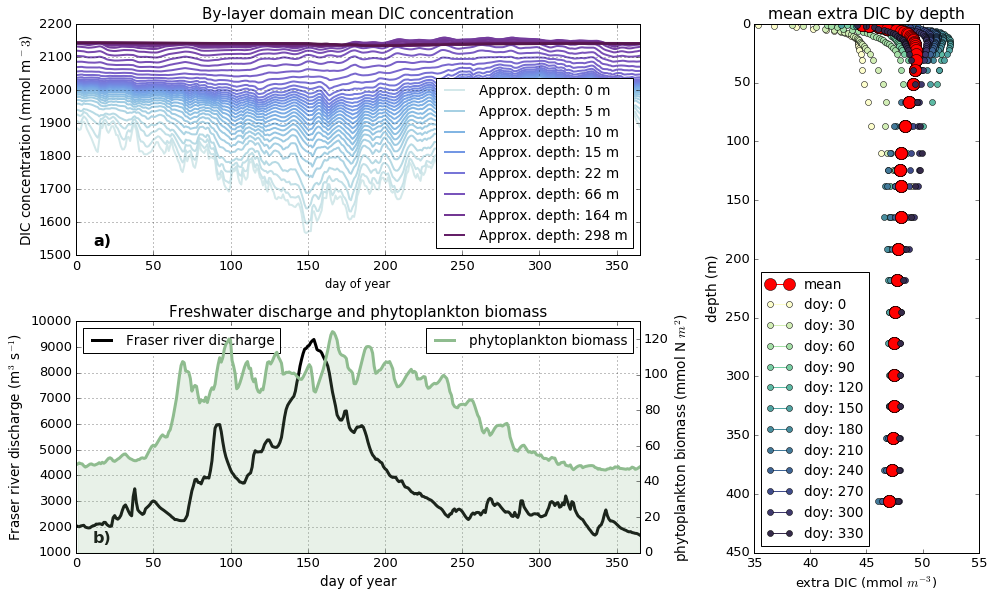

In [165]:
ts = 15 # title font
fs = 13.5 # all other font sizes
fact = 1
fig = plt.figure(figsize=(14*fact, 8.5*fact))
seg = 45
shift = 2
depth = mesh['e3t_0'][0,:,250,250]
ax1 = plt.subplot2grid((2,3), (0,0), colspan=2, rowspan=1)
tcm = cm.dense
for i in range(0,40):
    zdepth = np.sum(depth[0:i])
    if i%5 !=0: 
        ax1.plot(days_in,BR3_var[i,:],color = tcm(1.*(i+shift)/seg), linewidth = lw)
    if i%5 == 0:
        ax1.plot(days_in,BR3_var[i,:],color = tcm(1.*(i+shift)/seg),\
                label = 'Approx. depth: '+str(int(zdepth))+' m', linewidth = lw)
ax1.text(0.03, 0.03, 'a)', transform=ax1.transAxes, fontsize=16, fontweight='bold', va='bottom')
ax1.legend(loc = 'best', fontsize = fs)
plt.xlim([0,365*1])
plt.grid()
ax1.set_xlabel('day of year', fontsize = fs-2)
ax1.set_ylabel('DIC concentration (mmol m$^-3$)', fontsize = fs)
ax1.set_title('By-layer domain mean DIC concentration', fontsize = ts)


ax2 = plt.subplot2grid((2,3), (1,0), colspan=2, rowspan=1)
ax2b =ax2.twinx()
ax2.plot(days_in,Fraser_discharge,'-k', linewidth = 3, label = 'Fraser river discharge')
ax2.grid()
#ax2b.plot(days_in,flag_mas_mm_m2,color = 'greenyellow',label ='flagellates')
#ax2b.plot(days_in,diat_mas_mm_m2,color = 'mediumspringgreen',label ='diatoms')
#ax2b.plot(days_in,cili_mas_mm_m2,color = 'forestgreen',label ='ciliates')
ax2b.plot(days_in, flag_mas_mm_m2+cili_mas_mm_m2+diat_mas_mm_m2,\
          color = 'darkseagreen', label = 'phytoplankton biomass', linewidth = 3)
ax2b.fill_between(days_in, np.zeros_like(flag_mas_mm_m2), (flag_mas_mm_m2+cili_mas_mm_m2+diat_mas_mm_m2), \
                 color = 'darkseagreen', alpha = 0.2 )

ax2b.legend(loc = 'best', fontsize = fs)
ax2.legend(loc = 'upper left', fontsize = fs)
ax2b.set_ylabel('phytoplankton biomass (mmol N $m^2$)', fontsize = fs)
ax2.set_xlabel('day of year', fontsize = fs)
ax2.set_ylabel('Fraser river discharge (m$^3$ s$^{-1}$)', fontsize = fs)
ax2.set_title('Freshwater discharge and phytoplankton biomass', fontsize = ts)
plt.xlim([0,365])
ax2b.set_ylim([0,130])
ax2.text(0.03, 0.03, 'b)', transform=ax2.transAxes, fontsize=16, fontweight='bold', va='bottom')


ax3 = plt.subplot2grid((2,3), (0,2), colspan=1, rowspan=2)
ax3.text(0.03, 0.03, 'c)', transform=ax3.transAxes, fontsize=16, fontweight='bold', va='bottom')
tcm = cm.deep
mesh = nc.Dataset('//data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')



for d in range(0,12):
    for i in range(0,40):
        zdepth = np.sum(depth[0:i+1]) 
        if ((i == 0) & (d ==0)):        
            ax3.plot((np.nanmean(BR3_var,axis =1)[i]-\
                      np.nanmean(PI4_var,axis=1)[i]),zdepth,\
                     marker = 'o', color = 'r', markersize = 12, label = 'mean')
        else:
            ax3.plot((np.nanmean(BR3_var,axis =1)[i]-\
                      np.nanmean(PI4_var,axis=1)[i]),zdepth,\
                     marker = 'o', color = 'r', markersize = 12)
        if i == 0:
            ax3.plot((BR3_var[i,d*30]-PI4_var[i,d*30]),zdepth,\
                    color = tcm(1.*d/12), marker = 'o', linestyle = None, label = 'doy: '+ str(d*30))
        else:
            ax3.plot((BR3_var[i,d*30]-PI4_var[i,d*30]),zdepth,\
                    color = tcm(1.*d/12), marker = 'o')

ax3.set_title('mean extra DIC by depth')
ax3.invert_yaxis()
ax3.legend(loc = 'best', fontsize = fs)
ax3.set_xlabel('extra DIC (mmol $m^{-3}$)')
ax3.set_ylabel('depth (m)', fontsize = fs)
fig.tight_layout()





# by layer domain mean with extra DIC with 4 stations

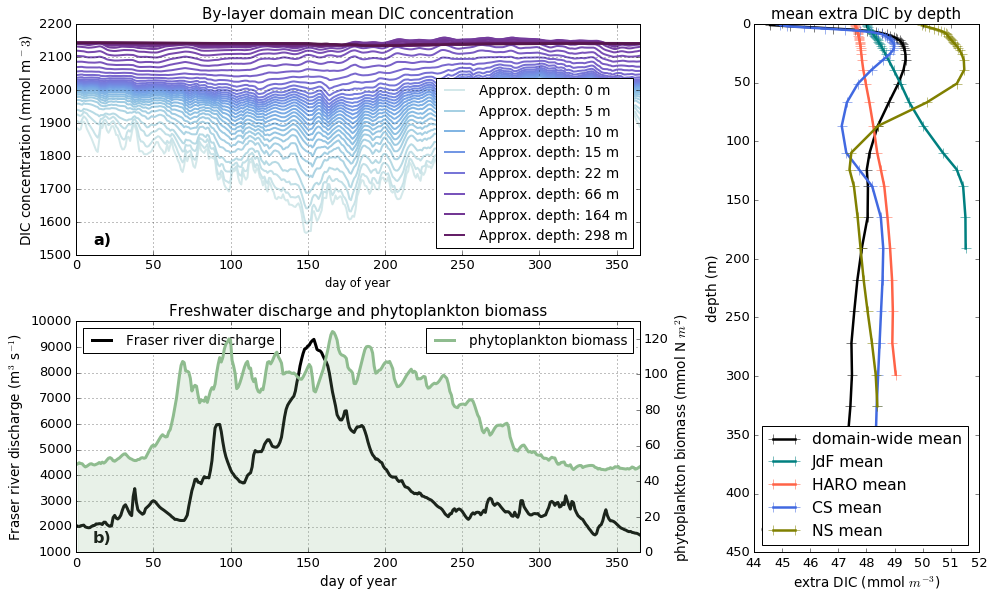

In [166]:
ts = 15 # title font
fs = 13.5 # all other font sizes
fact = 1
fig = plt.figure(figsize=(14*fact, 8.5*fact))
seg = 45
shift = 2
depth = mesh['e3t_0'][0,:,250,250]
ax1 = plt.subplot2grid((2,3), (0,0), colspan=2, rowspan=1)
tcm = cm.dense
for i in range(0,40):
    zdepth = np.sum(depth[0:i])
    if i%5 !=0: 
        ax1.plot(days_in,BR3_var[i,:],color = tcm(1.*(i+shift)/seg), linewidth = lw)
    if i%5 == 0:
        ax1.plot(days_in,BR3_var[i,:],color = tcm(1.*(i+shift)/seg),\
                label = 'Approx. depth: '+str(int(zdepth))+' m', linewidth = lw)
ax1.text(0.03, 0.03, 'a)', transform=ax1.transAxes, fontsize=16, fontweight='bold', va='bottom')
ax1.legend(loc = 'best', fontsize = fs)
plt.xlim([0,365*1])
plt.grid()
ax1.set_xlabel('day of year', fontsize = fs-2)
ax1.set_ylabel('DIC concentration (mmol m$^-3$)', fontsize = fs)
ax1.set_title('By-layer domain mean DIC concentration', fontsize = ts)


ax2 = plt.subplot2grid((2,3), (1,0), colspan=2, rowspan=1)
ax2b =ax2.twinx()
ax2.plot(days_in,Fraser_discharge,'-k', linewidth = 3, label = 'Fraser river discharge')
ax2.grid()
ax2b.plot(days_in, flag_mas_mm_m2+cili_mas_mm_m2+diat_mas_mm_m2,\
          color = 'darkseagreen', label = 'phytoplankton biomass', linewidth = 3)
ax2b.fill_between(days_in, np.zeros_like(flag_mas_mm_m2), (flag_mas_mm_m2+cili_mas_mm_m2+diat_mas_mm_m2), \
                 color = 'darkseagreen', alpha = 0.2 )

ax2b.legend(loc = 'best', fontsize = fs)
ax2.legend(loc = 'upper left', fontsize = fs)
ax2b.set_ylabel('phytoplankton biomass (mmol N $m^2$)', fontsize = fs)
ax2.set_xlabel('day of year', fontsize = fs)
ax2.set_ylabel('Fraser river discharge (m$^3$ s$^{-1}$)', fontsize = fs)
ax2.set_title('Freshwater discharge and phytoplankton biomass', fontsize = ts)
plt.xlim([0,365])
ax2b.set_ylim([0,130])
ax2.text(0.03, 0.03, 'b)', transform=ax2.transAxes, fontsize=16, fontweight='bold', va='bottom')


ax3 = plt.subplot2grid((2,3), (0,2), colspan=1, rowspan=2)
ax3.text(0.03, 0.03, 'c)', transform=ax3.transAxes, fontsize=16, fontweight='bold', va='bottom')
tcm = cm.deep
mesh = nc.Dataset('//data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')


BR3_dp = np.nanmean(BR3_var, axis =1)
PI4_dp = np.nanmean(PI4_var, axis =1)

BR3_jdf_dp = np.nanmean(BR3_var_jdf, axis =1)
PI4_jdf_dp = np.nanmean(PI4_var_jdf, axis =1)
BR3_cs_dp = np.nanmean(BR3_var_cs, axis =1)
PI4_cs_dp = np.nanmean(PI4_var_cs, axis =1)
BR3_ns_dp = np.nanmean(BR3_var_ns, axis =1)
PI4_ns_dp = np.nanmean(PI4_var_ns, axis =1)
BR3_haro_dp = np.nanmean(BR3_var_haro, axis =1)
PI4_haro_dp = np.nanmean(PI4_var_haro, axis =1)

zdepth = np.zeros(40)
for i in range(0,40):
    zdepth[i] = np.sum(depth[0:i+1]) 
    
ax3.plot(BR3_dp-PI4_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = 'k', markersize = 10, label = 'domain-wide mean')
ax3.plot(BR3_jdf_dp-PI4_jdf_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = jdf_col, markersize = 10, label = 'JdF mean')
ax3.plot(BR3_haro_dp-PI4_haro_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = haro_col, markersize = 10, label = 'HARO mean')
ax3.plot(BR3_cs_dp-PI4_cs_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = cs_col, markersize = 10, label = 'CS mean')
ax3.plot(BR3_ns_dp-PI4_ns_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = ns_col, markersize = 10, label = 'NS mean')


ax3.set_title('mean extra DIC by depth', fontsize = ts)
ax3.invert_yaxis()
ax3.legend(loc = 'best')
ax3.set_xlabel('extra DIC (mmol $m^{-3}$)', fontsize = fs)
ax3.set_ylabel('depth (m)', fontsize = fs)
fig.tight_layout()





In [167]:
print('calculation complete')

calculation complete


In [174]:
BR_var = np.zeros([40,365*3])
BR_var[:,0:365] = BR3_var- BR1_var
BR_var[:,365:2*365] = BR3_var - BR2_var

#
PI_var = np.zeros([40,365*3])
PI_var[:,0:365] = PI4_var- PI1_var
PI_var[:,365:2*365] = PI4_var - PI2_var
PI_var[:,365*2:3*365] = PI4_var - PI3rr_var

#### SPINUP METRICS - SUBTRACTING PREVIOUS RUNS (BR1,BR2 AND PI1-PI3rr) FROM MOST UP - TO - DATE RUN (BR3, PI4) - A PERFECTLY SPUN UP RUN WOULD HAVE NO DIFFERENCE. 

Text(0, 0.5, 'DIC difference')

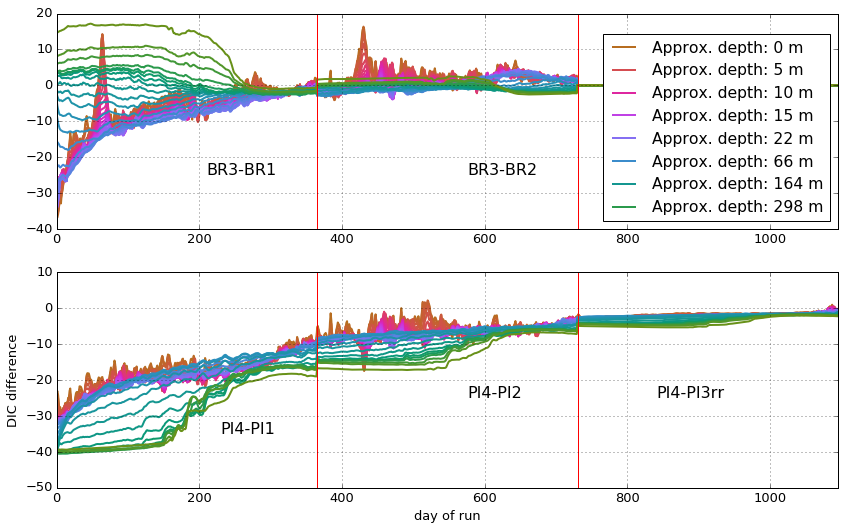

In [175]:

seg = 45
shift = 2
tcm = cm.phase
depth = mesh['e3t_0'][0,:,250,250]
days_in3 = np.arange(0,365*3,1)

fig = plt.figure(figsize=(14*fact, 8.5*fact))
ax1 = plt.subplot2grid((2,3), (0,0), colspan=3, rowspan=1)

for i in range(0,40):
    zdepth = np.sum(depth[0:i])
    if i%5 !=0: 
        ax1.plot(days_in3,BR_var[i,:],color = tcm(1.*(i+shift)/seg), linewidth = lw)
    if i%5 == 0:
        ax1.plot(days_in3,BR_var[i,:],color = tcm(1.*(i+shift)/seg),\
                label = 'Approx. depth: '+str(int(zdepth))+' m', linewidth = lw)
ax1.grid()
ax1.text(210,-25,'BR3-BR1', fontsize = 16)
ax1.text(210+365,-25,'BR3-BR2', fontsize = 16)
plt.axvline(x=365, color = 'r')
plt.axvline(x=365*2, color = 'r')

ax1.legend(loc = 'lower right')
ax1.set_xlim([0,1095])

ax2 = plt.subplot2grid((2,3), (1,0), colspan=3, rowspan=1)

for i in range(0,40):
    zdepth = np.sum(depth[0:i])
    if i%5 !=0: 
        ax2.plot(days_in3,PI_var[i,:],color = tcm(1.*(i+shift)/seg), linewidth = lw)
    if i%5 == 0:
        ax2.plot(days_in3,PI_var[i,:],color = tcm(1.*(i+shift)/seg),\
                label = 'Approx. depth: '+str(int(zdepth))+' m', linewidth = lw)

ax2.text(230,-35,'PI4-PI1', fontsize = 16)
ax2.text(210+365,-25,'PI4-PI2', fontsize = 16)
ax2.text(110+365*2,-25,'PI4-PI3rr', fontsize = 16)
ax2.grid()
ax2.set_xlabel('day of run')
plt.axvline(x=365, color = 'r')
plt.axvline(x=365*2, color = 'r')
ax2.set_xlim([0,1095])

ax2.set_xlabel('day of run')
ax2.set_ylabel('DIC difference')


Text(0.5, 1.0, 'By-layer domain mean DIC concentration - BR3 run - PI4 run ')

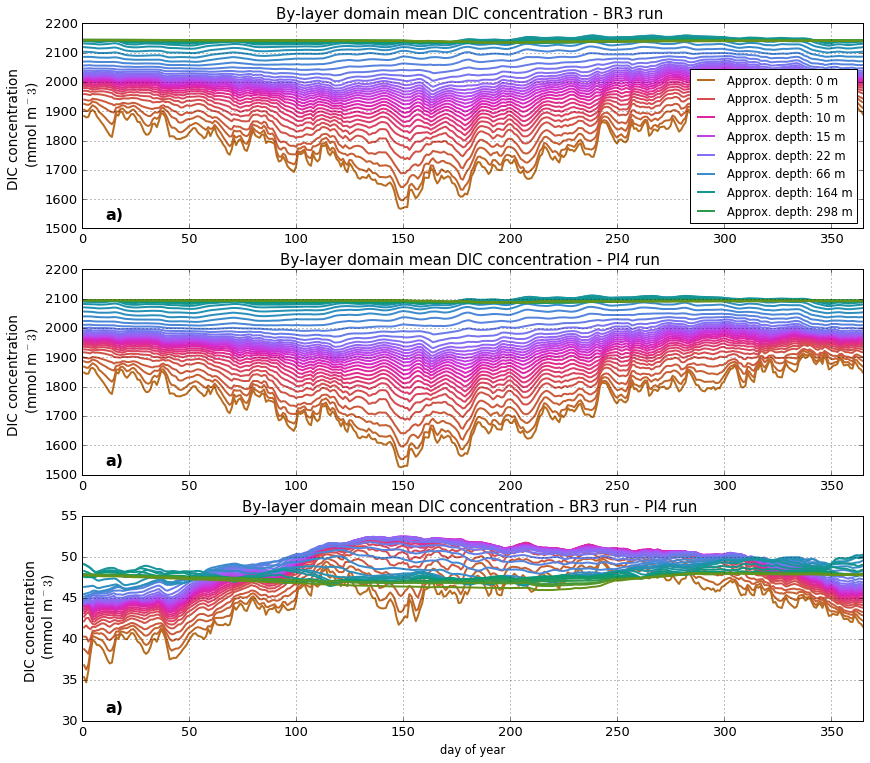

In [170]:

seg = 45
shift = 2
tcm = cm.deep
depth = mesh['e3t_0'][0,:,250,250]


fig = plt.figure(figsize=(14*fact, 12.5*fact))

ax1 = plt.subplot2grid((3,3), (0,0), colspan=3, rowspan=1)

tcm = cm.phase
for i in range(0,40):
    zdepth = np.sum(depth[0:i])
    if i%5 !=0: 
        ax1.plot(days_in,BR3_var[i,:],color = tcm(1.*(i+shift)/seg), linewidth = lw)
    if i%5 == 0:
        ax1.plot(days_in,BR3_var[i,:],color = tcm(1.*(i+shift)/seg),\
                label = 'Approx. depth: '+str(int(zdepth))+' m', linewidth = lw)
ax1.text(0.03, 0.03, 'a)', transform=ax1.transAxes, fontsize=16, fontweight='bold', va='bottom')
ax1.legend(loc = 'best', fontsize = fs-2)
plt.xlim([0,365*1])
plt.grid()
#ax1.set_xlabel('day of year', fontsize = fs-2)
ax1.set_ylabel('DIC concentration \n (mmol m$^-3$)', fontsize = fs)
ax1.set_title('By-layer domain mean DIC concentration - BR3 run ', fontsize = ts)


ax2 = plt.subplot2grid((3,3), (1,0), colspan=3, rowspan=1)
for i in range(0,40):
    zdepth = np.sum(depth[0:i])
    if i%5 !=0: 
        ax2.plot(days_in,PI4_var[i,:],color = tcm(1.*(i+shift)/seg), linewidth = lw)
    if i%5 == 0:
        ax2.plot(days_in,PI4_var[i,:],color = tcm(1.*(i+shift)/seg),\
                label = 'Approx. depth: '+str(int(zdepth))+' m', linewidth = lw)
ax2.text(0.03, 0.03, 'a)', transform=ax2.transAxes, fontsize=16, fontweight='bold', va='bottom')
#ax2.legend(loc = 'best', fontsize = fs-2)
plt.xlim([0,365*1])
plt.grid()
#ax2.set_xlabel('day of year', fontsize = fs-2)
ax2.set_ylabel('DIC concentration \n (mmol m$^-3$)', fontsize = fs)
ax2.set_title('By-layer domain mean DIC concentration - PI4 run ', fontsize = ts)


ax3 = plt.subplot2grid((3,3), (2,0), colspan=3, rowspan=1)
for i in range(0,40):
    zdepth = np.sum(depth[0:i])
    if i%5 !=0: 
        ax3.plot(days_in,BR3_var[i,:]-PI4_var[i,:],color = tcm(1.*(i+shift)/seg), linewidth = lw)
    if i%5 == 0:
        ax3.plot(days_in,BR3_var[i,:]-PI4_var[i,:],color = tcm(1.*(i+shift)/seg),\
                label = 'Approx. depth: '+str(int(zdepth))+' m', linewidth = lw)
ax3.text(0.03, 0.03, 'a)', transform=ax3.transAxes, fontsize=16, fontweight='bold', va='bottom')
#ax3.legend(loc = 'best', fontsize = fs-2)
plt.xlim([0,365*1])
plt.grid()
ax3.set_xlabel('day of year', fontsize = fs-2)
ax3.set_ylabel('DIC concentration \n (mmol m$^-3$)', fontsize = fs)
ax3.set_title('By-layer domain mean DIC concentration - BR3 run - PI4 run ', fontsize = ts)

No handles with labels found to put in legend.
No handles with labels found to put in legend.


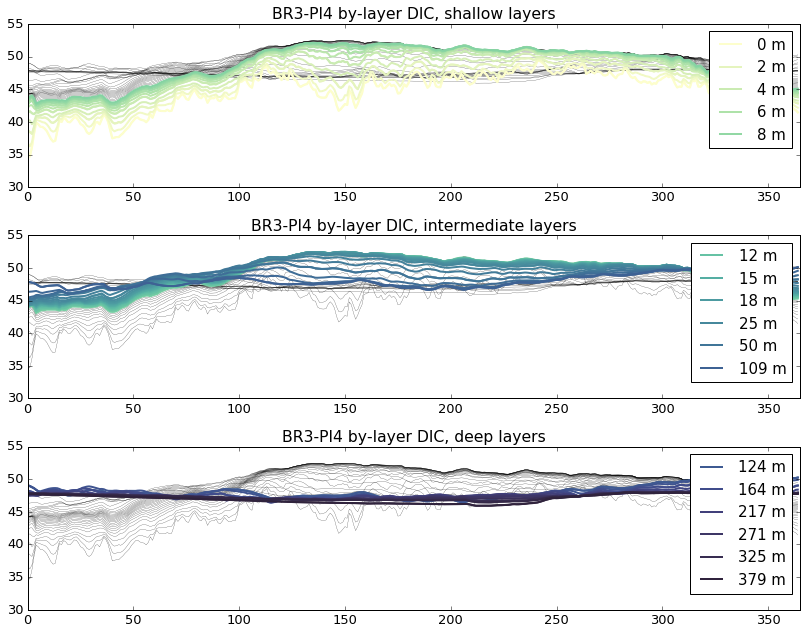

In [177]:
BR3_means_DIC = pickle.load(open('../pkls/BR3_DIC_means_inletsIN.pkl', 'rb'))
PI4_means_DIC = pickle.load(open('../pkls/PI4_DIC_means_inletsIN.pkl', 'rb'))

BR_var = BR3_means_DIC
PI_var = PI4_means_DIC

tcm = cm.deep
fact = 0.6
fig = plt.figure(figsize=(19*fact,15*fact))
days_in = np.arange(0,365*1,1)
mesh = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
depth = mesh['e3t_0'][0,:,250,250]

ax = fig.add_subplot(3,1,1)


for i in range(0,40):
    zdepth = np.sum(depth[0:i])
    ax.plot(days_in,BR_var[i,:] - PI_var[i,:],color = 'k', linewidth = 0.2)

for i in range(0,10):    
    zdepth = np.sum(depth[0:i])
    ax.plot(days_in,BR_var[i,:] - PI_var[i,:],color = tcm(1.*i/40), linewidth = 2)
    if i%2 == 0:
        ax.plot(days_in,BR_var[i,:] - PI_var[i,:],color = tcm(1.*i/40), linewidth = 2, label = str(int(zdepth)) + ' m')
    ax.legend(bbox_to_anchor = [1,1], fontsize = 15)
ax.set_xlim([0,365])
plt.title('BR3-PI4 by-layer DIC, shallow layers')

ax = fig.add_subplot(3,1,2)


for i in range(0,40):
    zdepth = np.sum(depth[0:i])
    ax.plot(days_in,BR_var[i,:] - PI_var[i,:],color = 'k', linewidth = 0.2)

for i in range(10,28):    
    zdepth = np.sum(depth[0:i])
    ax.plot(days_in,BR_var[i,:] - PI_var[i,:],color = tcm(1.*i/40), linewidth = 2)
    if i%3 == 0:
        ax.plot(days_in,BR_var[i,:] - PI_var[i,:],color = tcm(1.*i/40), linewidth = 2, label = str(int(zdepth)) + ' m')
    ax.legend(bbox_to_anchor = [1,1], fontsize = 15)
ax.set_xlim([0,365])
plt.title('BR3-PI4 by-layer DIC, intermediate layers')

ax = fig.add_subplot(3,1,3)

for i in range(0,40):
    zdepth = np.sum(depth[0:i])
    ax.plot(days_in,BR_var[i,:] - PI_var[i,:],color = 'k', linewidth = 0.2)

for i in range(28,40):    
    zdepth = np.sum(depth[0:i])
    ax.plot(days_in,BR_var[i,:] - PI_var[i,:],color = tcm(1.*i/40), linewidth = 2)
    if i%2 == 0:
        ax.plot(days_in,BR_var[i,:] - PI_var[i,:],color = tcm(1.*i/40), linewidth = 2, label = str(int(zdepth)) + ' m')
    ax.legend(bbox_to_anchor = [1,1], fontsize = 15)
ax.set_xlim([0,365])
plt.title('BR3-PI4 by-layer DIC, deep layers')

plt.tight_layout()